# Homework 4

## Tyler Valdez (UTEID: trv359)

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [4]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [5]:
nyc = pd.DataFrame(df)
# Adding column names to dataframe
nyc.columns =['Taxi ID', 'Driver ID', 'Pickup Time', 'Dropoff Time', 'Trip Time', 'Trip Distance', 'Pickup Longitude', 'Pickup Latitude', 'Dropoff Longitude', 'Dropoff Latitide', 'Payment Type', 'Fare Amount', 'Surcharge in Dollars', 'MTA Tax', 'Tip Amount In Dollars', 'Tolls Amount in Dollars', 'Total Amount']  
# Outputting new dataframe
nyc

,Taxi ID,Driver ID,Pickup Time,Dropoff Time,Trip Time,Trip Distance,Pickup Longitude,Pickup Latitude,Dropoff Longitude,Dropoff Latitide,Payment Type,Fare Amount,Surcharge in Dollars,MTA Tax,Tip Amount In Dollars,Tolls Amount in Dollars,Total Amount
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [6]:
# Dropping Rows with a Trip Distance less than 1
nyc1 = nyc.drop(nyc[nyc['Trip Distance'] < 1].index)
# Dropping rows with a Total Amount greater than 20
nyc2 = nyc1.drop(nyc1[nyc1['Fare Amount'] > 20].index)
# Outputting new dataframe
nyc2

,Taxi ID,Driver ID,Pickup Time,Dropoff Time,Trip Time,Trip Distance,Pickup Longitude,Pickup Latitude,Dropoff Longitude,Dropoff Latitide,Payment Type,Fare Amount,Surcharge in Dollars,MTA Tax,Tip Amount In Dollars,Tolls Amount in Dollars,Total Amount
7,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
8,5F78CC6D4ECD0541B765FECE17075B6F,B7567F5BFD558C665D23B18451FE1FD1,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.21,-73.973000,40.793140,-73.981453,40.778465,CRD,6.0,0.5,0.5,1.30,0.0,8.30
17,655E773C92FA446353D5C8B7416BE818,B6EAE07E2AD023B387EE5F09BB2D89E3,2013-01-01 00:02:00,2013-01-01 00:05:00,180,1.55,-74.003197,40.733032,-74.012985,40.717377,CRD,6.0,0.5,0.5,1.62,0.0,8.62
27,D9598D121715B456C101D5CF72DEF513,34887B903219BC5FE57B3A860DB74C1F,2013-01-01 00:01:00,2013-01-01 00:06:00,300,1.04,-73.981918,40.771168,-73.969978,40.767078,CSH,6.0,0.5,0.5,0.00,0.0,7.00
30,4707DD250F4F2269CF31DA87314A35DE,4E0CF2EFC2B6F83FB8CDC8B49023970A,2013-01-01 00:00:00,2013-01-01 00:07:00,420,1.22,-73.996132,40.739567,-74.004288,40.750999,CRD,7.0,0.5,0.5,2.00,0.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,9F8C0E2FD73112A4F8D747200CD5FF8E,7DE181DCBE506D2278E37DD6F7FB060B,2013-01-01 03:41:00,2013-01-01 03:46:00,300,2.20,-73.982407,40.731586,-73.963921,40.756981,CRD,8.0,0.5,0.5,2.12,0.0,11.12
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [7]:
# For real world application, when searching through this database
# A Taxi ID now serves as the index when searching the database
nyc3 = nyc2.set_index('Taxi ID')
nyc3

,Driver ID,Pickup Time,Dropoff Time,Trip Time,Trip Distance,Pickup Longitude,Pickup Latitude,Dropoff Longitude,Dropoff Latitide,Payment Type,Fare Amount,Surcharge in Dollars,MTA Tax,Tip Amount In Dollars,Tolls Amount in Dollars,Total Amount
Taxi ID,,,,,,,,,,,,,,,,
468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
5F78CC6D4ECD0541B765FECE17075B6F,B7567F5BFD558C665D23B18451FE1FD1,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.21,-73.973000,40.793140,-73.981453,40.778465,CRD,6.0,0.5,0.5,1.30,0.0,8.30
655E773C92FA446353D5C8B7416BE818,B6EAE07E2AD023B387EE5F09BB2D89E3,2013-01-01 00:02:00,2013-01-01 00:05:00,180,1.55,-74.003197,40.733032,-74.012985,40.717377,CRD,6.0,0.5,0.5,1.62,0.0,8.62
D9598D121715B456C101D5CF72DEF513,34887B903219BC5FE57B3A860DB74C1F,2013-01-01 00:01:00,2013-01-01 00:06:00,300,1.04,-73.981918,40.771168,-73.969978,40.767078,CSH,6.0,0.5,0.5,0.00,0.0,7.00
4707DD250F4F2269CF31DA87314A35DE,4E0CF2EFC2B6F83FB8CDC8B49023970A,2013-01-01 00:00:00,2013-01-01 00:07:00,420,1.22,-73.996132,40.739567,-74.004288,40.750999,CRD,7.0,0.5,0.5,2.00,0.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9F8C0E2FD73112A4F8D747200CD5FF8E,7DE181DCBE506D2278E37DD6F7FB060B,2013-01-01 03:41:00,2013-01-01 03:46:00,300,2.20,-73.982407,40.731586,-73.963921,40.756981,CRD,8.0,0.5,0.5,2.12,0.0,11.12
A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25


In [8]:
# Organizing dataframe based on date of pickup time
# Allows viewer to see data in chronological order
clean_nyc = nyc3.sort_values(by='Pickup Time',ascending=True)
clean_nyc

,Driver ID,Pickup Time,Dropoff Time,Trip Time,Trip Distance,Pickup Longitude,Pickup Latitude,Dropoff Longitude,Dropoff Latitide,Payment Type,Fare Amount,Surcharge in Dollars,MTA Tax,Tip Amount In Dollars,Tolls Amount in Dollars,Total Amount
Taxi ID,,,,,,,,,,,,,,,,
468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
4A9DED62DD8EA1E1988C55F7141DC1F7,F4B5F923554A0BB822F26FCB25923D67,2013-01-01 00:00:00,2013-01-01 00:09:00,540,2.14,-73.975723,40.781693,-73.969147,40.760975,CRD,9.5,0.5,0.5,3.33,0.0,13.83
7BC6CF05C09B7004E9027865D2383E49,3EDBF6ACFAE5F4A43BFDE207876241D7,2013-01-01 00:00:00,2013-01-01 00:19:00,1140,2.81,-73.989845,40.758041,-73.972008,40.757069,CSH,14.5,0.5,0.5,0.00,0.0,15.50
11824BDB29534D49B7B7113D4CA0F7B2,18D6A12B4FB3AC12D118FB1633AAACED,2013-01-01 00:00:00,2013-01-01 00:10:00,600,2.77,-73.989616,40.729988,-74.013779,40.705036,CRD,10.5,0.5,0.5,2.20,0.0,13.70
37FBBEFC47751F81BAE4BA8394FE45A8,846DDE5D7AFE3AE43BFA8F0F15DFD9B0,2013-01-01 00:00:00,2013-01-01 00:10:00,600,1.85,-74.002998,40.725121,-74.006783,40.741566,CSH,9.0,0.5,0.5,0.00,0.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AB5964E59B2458472E68FF8904D35B6A,00374328FBA75FBFCA7522671250F573,2013-01-01 03:41:00,2013-01-01 03:45:00,240,1.01,-73.979454,40.677860,-73.983498,40.687176,CSH,5.5,0.5,0.5,0.00,0.0,6.50
185B9C66B803EFD690D102A9759C41D7,9AF4A2B3B28E1A6A8A636EE1FCEC371F,2013-01-01 03:41:00,2013-01-01 03:46:00,300,1.22,-73.937935,40.712643,-73.958221,40.710400,CRD,6.5,0.5,0.5,1.75,0.0,9.25
24F9961BA0E96BD68D069E02C4346264,3B1EC68F7C2435433BDA0DE7DB05AF68,2013-01-01 03:42:00,2013-01-01 03:45:00,180,1.25,-73.974075,40.760246,-73.962395,40.770576,CSH,5.5,0.5,0.5,0.00,0.0,6.50


## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

Trip Distance & Trip Time - As Trip Distance increases, Trip Time increases
(Moderate Positive Relationship)

Trip Distance & Fare Amount - As Trip Distance increases, Fare Amount increases
(Fairly Strong Positive Relationship)

Trip Time & Fare Amount - As Fare Amount increases, Trip Time increases
(Fairly Strong Positive Relationship)

               Trip Distance  Trip Time  Fare Amount
Trip Distance       1.000000   0.658674     0.929334
Trip Time           0.658674   1.000000     0.873386
Fare Amount         0.929334   0.873386     1.000000
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa32ab5bd0>


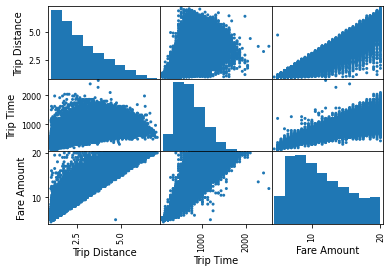

In [9]:
# Making a list of the requested columns to use for getting correlation
cor = list(['Trip Distance','Trip Time','Fare Amount'])
# Outputting correlation score between the columns
correlation = clean_nyc[cor].corr()
print(correlation)
# Creating and outputting a scaterplot matrix of the columns and their correlation
print(scatter_matrix(clean_nyc[cor], alpha = 1))

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [10]:
distance = clean_nyc["Trip Distance"]
money = clean_nyc["Fare Amount"]
my_X = np.vstack((distance, )).T
reg = LinearRegression().fit(my_X, money)
print( "Regression coefficient is", reg.coef_, " and Regression Intercept is" ,reg.intercept_)
print('The Linear Regression Equation would be y =', reg.coef_[0],'x +', reg.intercept_ )
print('For a 3 mile trip using my linear regression model, the fare amount will be $',2.81446011 * 3 + reg.intercept_)

Regression coefficient is [2.81446011]  and Regression Intercept is 3.777694609356378
The Linear Regression Equation would be y = 2.814460114901107 x + 3.777694609356378
For a 3 mile trip using my linear regression model, the fare amount will be $ 12.221074939356377


## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [11]:
my_X = clean_nyc[["Trip Distance", "Trip Time"]]
money = clean_nyc["Total Amount"]
reg = LinearRegression().fit(my_X, money)
print( "Regression coefficient's are", reg.coef_, " and Regression Intercept is" ,reg.intercept_)
print('The Multiple Linear Regression Equation would be y =', reg.coef_[0],'x1 +', reg.coef_[1],'x2 + ', reg.intercept_ )
print('For a 3 mile trip using my multiple linear regression model, with 6 minute travel time, the fare amount will be $',reg.coef_[0] * 3 + reg.coef_[1] * 6 + reg.intercept_)

Regression coefficient's are [2.12746659 0.00613523]  and Regression Intercept is 3.233274669652209
The Multiple Linear Regression Equation would be y = 2.1274665881349595 x1 + 0.00613523472763898 x2 +  3.233274669652209
For a 3 mile trip using my multiple linear regression model, with 6 minute travel time, the fare amount will be $ 9.652485842422921


## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


Sample size 34275.0
Iteration No.= 0  m =  0.03461434690007312  b= 0.011267877461706783  Cost= 142.0429978118162
Iteration No.= 50  m =  1.4010960387590357  b= 0.46123869587379684  Cost= 56.44610637296626
Iteration No.= 100  m =  2.2440041951298024  b= 0.748112680477317  Cost= 23.659720153935
Iteration No.= 150  m =  2.762964068420191  b= 0.9339951289282439  Cost= 11.093356018432425
Iteration No.= 200  m =  3.081497277140508  b= 1.0573154609244433  Cost= 6.268947849344351
Iteration No.= 250  m =  3.276034912591845  b= 1.1418532041499676  Cost= 4.408959506266912
Stoped at iteration 294
Regression coefficients are m =  3.3826870018531072  and b= 1.1959974283612136


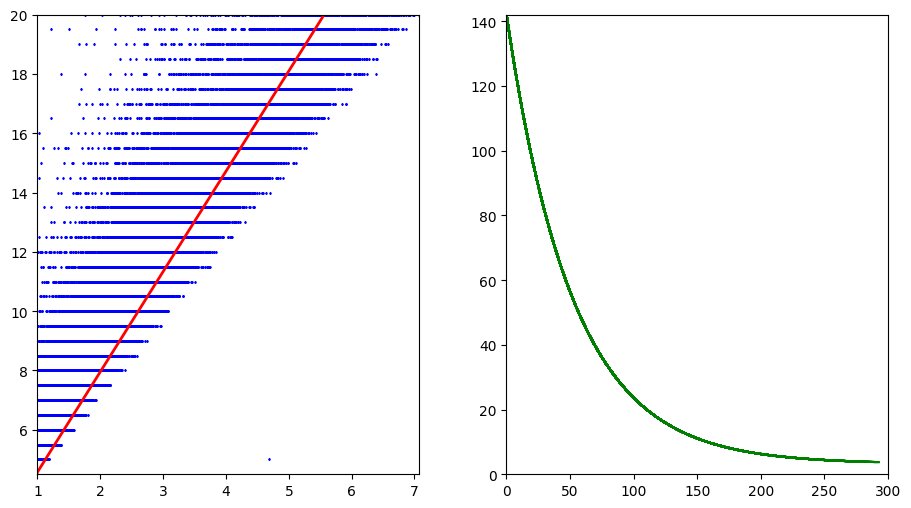

In [64]:
# Setting up visualization
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='white', edgecolor='purple')

# 1st Subfigure with line of best fit
ax1=plt.subplot(1, 2, 1)
ax1.set_xlim(left = np.min(distance), right=np.max(distance))
ax1.set_ylim(bottom = np.min(money), top=np.max(money))
ax1.plot(distance, money, 'o', markersize=2)

# Second sub figure showing cost over period of time
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)
plt.tight_layout(pad=4.0)

# X and Y Variables
distance = clean_nyc["Trip Distance"]
money = clean_nyc["Fare Amount"]

# Initializing B and M
b_current = 0 
m_current = 0

# Learning rate, number of iterations, and precision
learningRate = 0.001
num_iteration = 300
precision = 0.01
previous_step_size = 1 

# Calculating n and sample size
n = float(len(money)) 
print("Sample size", n)

# Initializing X, Y, and cost values into numpy arrays
oldCost=0
xx, costHist = [], [] 
y_prediction = m_current * distance + b_current
initCost= (1/n) * sum (( y_prediction - money)**2)

# Setting subplot 2 graph limits
ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)

# Main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Y Predictor with coefficients
    y_prediction = m_current * distance + b_current
    # Computing costs for subplot 2
    cost= (1/n) * sum (( y_prediction - money)**2)
    # Calculating gradients 
    m_gradient = (1.0/n) * sum (distance*(y_prediction - money) )
    b_gradient = (1.0/n) * sum (y_prediction - money)
    # Updating regression coefficients
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    # Stops the for loop if cost is decresing.
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    oldCost = cost
    
    # Graphing visualization
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    ax1.clear()
    ax1.set_xlim(left = np.min(distance), right=np.max(distance))
    ax1.set_ylim(bottom = np.min(money), top=np.max(money))
    ax1.plot(distance, money, 'd', color='blue', markersize=1)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # Updating cost diagram
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='green')
    fig.canvas.draw()

    if(i % 50 ==0):
      print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost)

# Prints regression coefficients
print("Regression coefficients are m = ", m_current, " and b=", b_current)